In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [5]:
root_dir = abspath(join(pardir, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [6]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/metal',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/Thesis-Project']

In [7]:
from utils import safe_mkdir, style

style()

In [8]:
root_data_dir = abspath(join(root_dir, "Data"))
name = "metal"
spectral_dir = join(root_data_dir, "Cluster", name)
eff_dir = join(root_data_dir, "Effective-Volume", name)

In [10]:
df_comp = vaex.open(join(eff_dir, "effective-volume-completeness.hdf5"))
df_comp

#,z,0,1,2
0,-399.19839679358716,0.12664700602365184,0.19030401127342206,0.19215908054320238
1,-397.59519038076155,0.12657866270498866,0.19045824500709957,0.19261217184355234
2,-395.9919839679359,0.1265098183900226,0.19061205703263853,0.1930671273686763
3,-394.3887775551102,0.12644052743623704,0.1907656584899403,0.19352390010210854
4,-392.78557114228454,0.12637097499919592,0.19091974608207646,0.1939823087784687
...,...,...,...,...
494,392.7855711422846,0.12637097499919592,0.19091974608207646,0.1939823087784687
495,394.38877755511027,0.12644052743623704,0.1907656584899403,0.19352390010210851
496,395.99198396793594,0.1265098183900226,0.19061205703263853,0.19306712736867626
497,397.59519038076155,0.12657866270498866,0.19045824500709957,0.19261217184355234


In [11]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()
spec_files

['/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(-0.00)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.14)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.33)_(0.37).hdf5']

In [16]:
index = 0
gaia = vaex.open(spec_files[index])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.2201629876964979,0.2702504814768162,7.997000217437744,7.894999980926514,AAA,2778150740165184128,16.998252868652344,-11.075251542961906,0.04176903888583183,-12.894936481474414,0.029159042984247208,5.914871851212826,0.03481418639421463,8.508554458618164,8.6373929977417,8.261209487915039,3396.260009765625,4012.212890625,1.3601963520050049,1.1726996898651123,-1.002114300788497,-0.8270582585381293,173.48899841308594,172.55419921875,174.42539978027344,0.042100001126527786,0.03869999945163727,0.04560000076889992,0.27000001072883606,0.18000000715255737,0.3499999940395355,A,00502745+1529031,1,111,--,5.8800530433654785,apogee,0.045102618634700775,0.045102618634700775,1.0,7391.5791015625,gspphot,7.9814453125,8.3759765625,0.0,4.069699764251709,gspphot,0.004599571228027344,0.004500389099121094,0.0,-0.0078103989362716675,apogee,0.004705278668552637,0.004705278668552637,1.0,-0.04127899929881096,apogee,0.005884386133402586,0.005884386133402586,1.0,-0.25,gspspec,0.02000001072883606,0.030000001192092896,0.0,-0.11557470262050629,apogee,0.01113793533295393,0.01113793533295393,1.0,0.10200023651123047,1.8567269166835105,169.06537033341695,-124.42245402978985,114.46463374850877,-11.147579253592994,-12.832461197525705,0.0417687004149701,0.02915952782278522,0.045102618634700775,-10.283547574035723,-8.933333974293324,-0.06488174305961354,-0.06233051181031162,-11.28979360122078,0.05505834252411959,-3.5870510091274106,0.05667861773771209,5.5956238249226775,0.06074559154961431,-7.833286975995648,0.058374065461303234,0.6727944269991919,2.2785075109875415,-0.04127899929881096
1,0.5662548145032581,0.22996173735609207,7.258999824523926,7.198999881744385,AAA,74117327209628288,10.993607521057129,-10.479117231994195,0.04243909567594528,3.3237802763638196,0.031028585508465767,6.032688056101913,0.041464757174253464,7.69224214553833,7.7952094078063965,7.490442276000977,610.977294921875,1528.1343994140625,1.0398861169815063,1.1665147542953491,-0.5122464886561988,-0.793040752195522,166.28309631347656,164.095703125,167.7216033935547,0.12319999933242798,0.11640000343322754,0.1298999935388565,nan,nan,nan,A,02094656+1310330,1,111,--,17.406938552856445,apogee,0.0658486932516098,0.0658486932516098,1.0,7818.31884765625,gspphot,15.78759765625,17.7333984375,0.0,3.950900077819824,gspphot,0.006200075149536133,0.008199930191040039,0.0,-0.07806000113487244,apogee,0.005174000281840563,0.005174000281840563,1.0,-0.09969999641180038,gspphot,0.023700006306171417,0.022899992763996124,0.0,-0.07000000029802322,gspspec,0.020000003278255463,0.030000001192092896,0.0,-0.11949469894170761,apogee,0.011420090682804585,0.011420090682804585,1.0,0.059999942779541016,1.161554169474761,165.76358510507188,-118.10493061468055,116.31333333452318,-10.897991289861372,-1.4467892498662314,0.04061465269326403,0.033381131602355084,0.0658486932516098,-1.1367703717797015,-8.562763105527008,-0.02736728138213866,-0.06694960890998258,-13.199924578065803,0.050694405748574235,11.404198691466688,0.05015072999461402,14.137343659026367,0.054659609547700244,-1.8740795240362704,0.06332197830362893,0.4990512609302807,2.129281894904255,-0.09969999641180038
2,0.6484026627391881,0.5190038821831584,7.8429999351501465,7.714000225067139,AAA,131473694870545152,36.358

# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto \frac{z^2}{\sigma_\varpi \sin^3 b} \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

In [27]:
from hammer import vertical

gaia = gaia[['parallax', 'e_parallax', 'GLAT']]
gaia = gaia.dropna()
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()
n = 50_000
z_arr = vertical.generate_z(p, p_err, b, n=n)
print("halo", z_arr.shape)

halo (50000, 558)


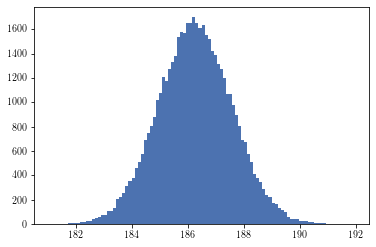

In [28]:
plt.hist(z_arr[:, 10], bins=100);

# Load the z distances

(0.0, 1.0)

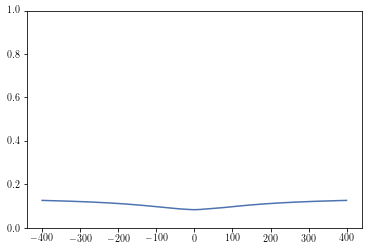

In [29]:
z = df_comp['z'].to_numpy()
frac = df_comp[str(index)].to_numpy()
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

plt.plot(z, frac)
plt.ylim(0,1)

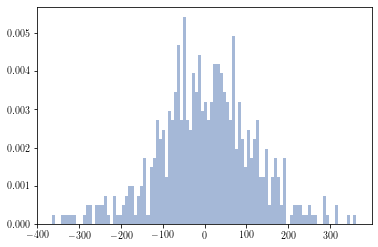

In [30]:
plt.hist(z_arr[1800], bins=100, density=True, alpha=0.5);

In [31]:
# zb = np.max(z)
zb = 400.0
zmax = np.minimum(np.max(z_arr), zb)
zmin = np.maximum(np.min(z_arr), -zb)
zmax, zmin

(373.8941540856479, -387.3378759421725)

In [32]:
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 20)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
comp = compz(zmid)
mask = (comp > 0)*(znum > 0)
znum = znum[mask]
zmid = zmid[mask]
zerr = np.sqrt(znum)

M = z_arr.shape[0]
znum_est = np.empty((M, len(znum)), dtype=int)
for i in tqdm(range(M)):
    z_realization = z_arr[i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:02<00:00, 18371.43it/s]


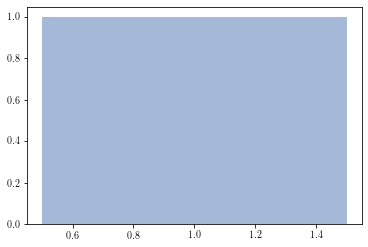

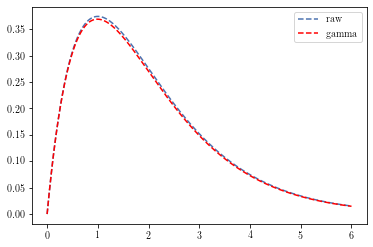

comp 0.12523020097986848
[0.99218385]


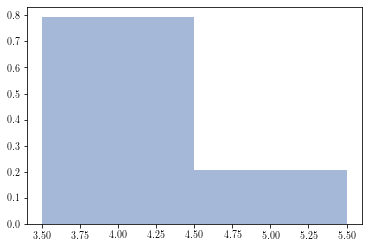

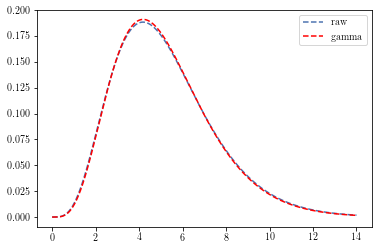

comp 0.12308779409679398
[4.18709125]


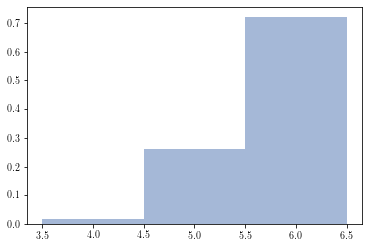

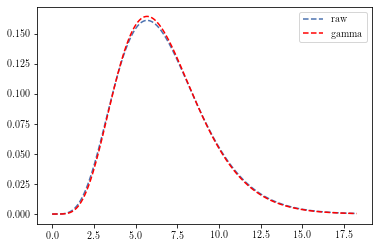

comp 0.1204845942121026
[5.69283231]


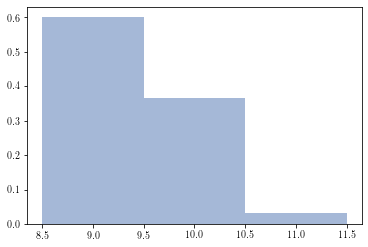

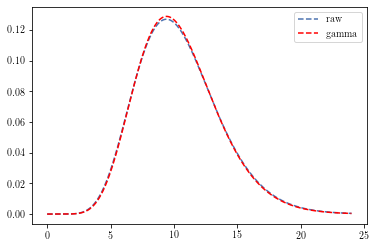

comp 0.11729605681852504
[9.4150473]


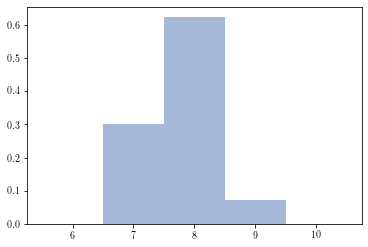

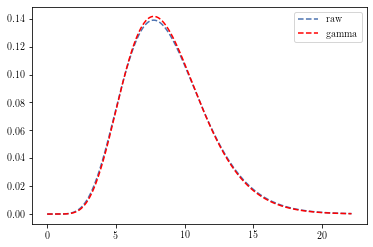

comp 0.11335780593781229
[7.75543105]


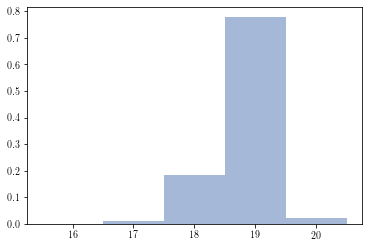

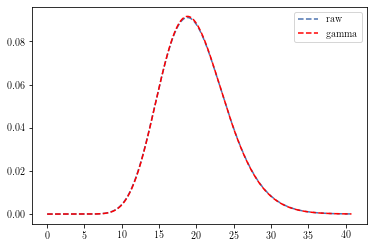

comp 0.10849143689859153
[18.81112064]


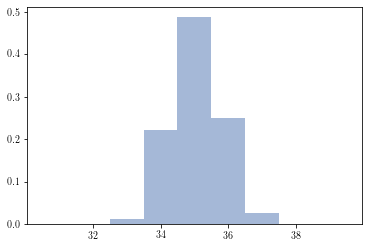

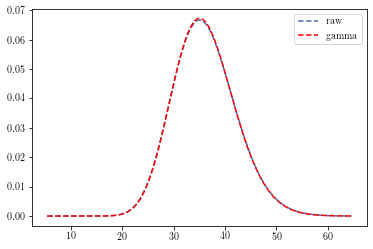

comp 0.10255290287798201
[35.05143266]


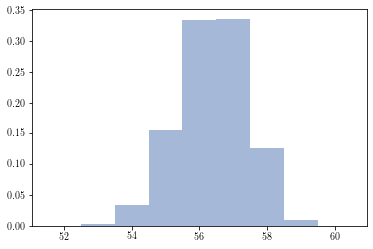

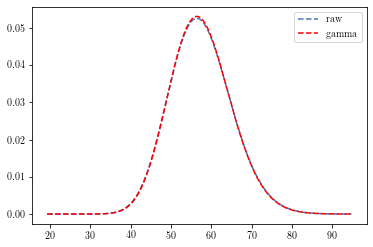

comp 0.09564250753310516
[56.38214477]


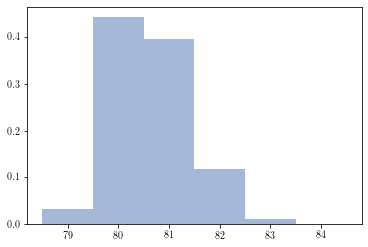

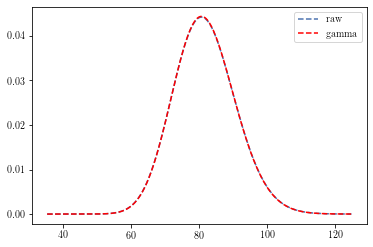

comp 0.0887798545953524
[80.628337]


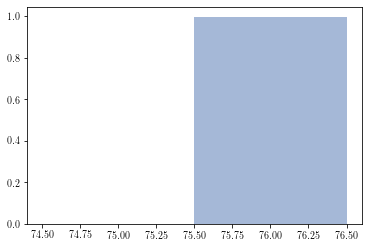

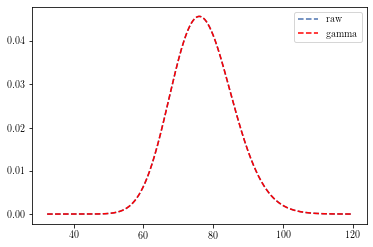

comp 0.0842027162646645
[75.99784994]


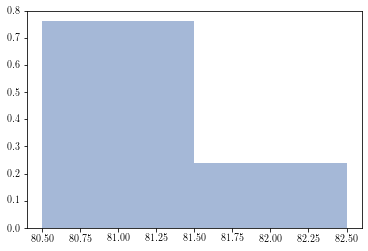

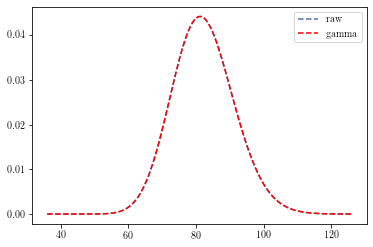

comp 0.08696771355498772
[81.23695079]


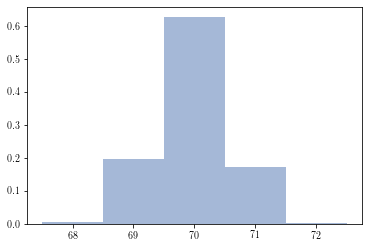

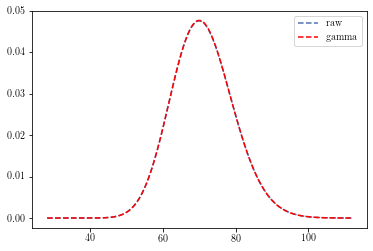

comp 0.0931333097388487
[69.96797329]


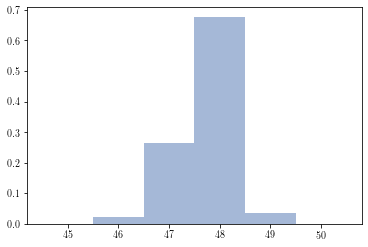

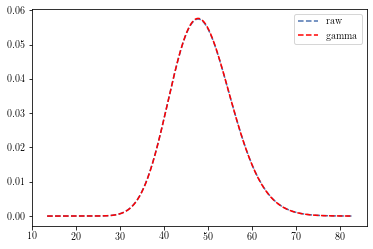

comp 0.10022949402291724
[47.72408468]


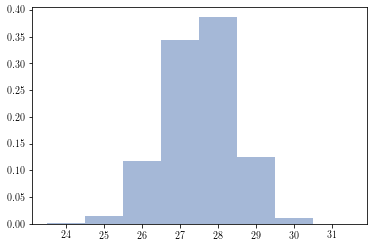

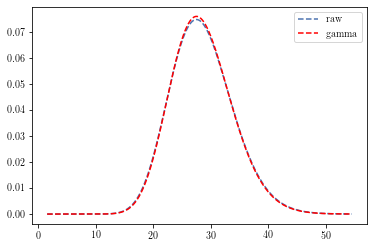

comp 0.10654376541676328
[27.50686784]


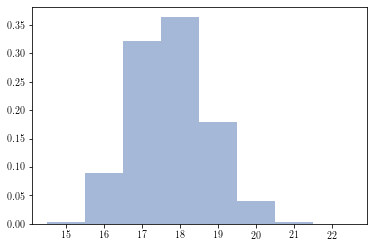

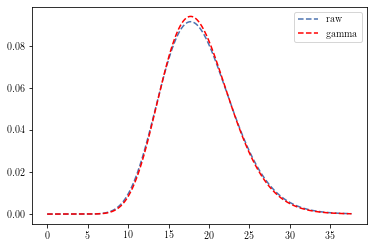

comp 0.11177408526450368
[17.7362191]


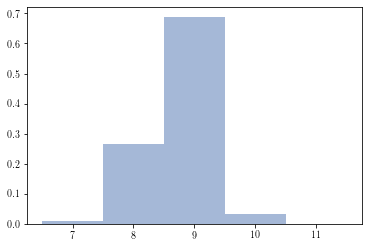

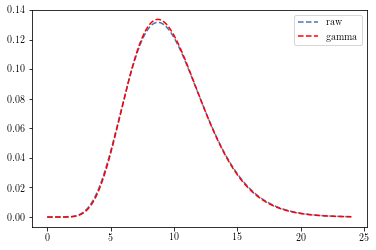

comp 0.11601498808875071
[8.7343907]


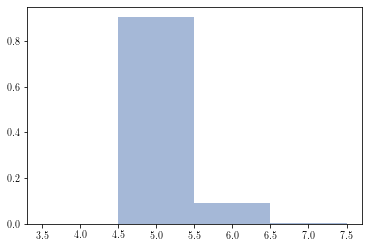

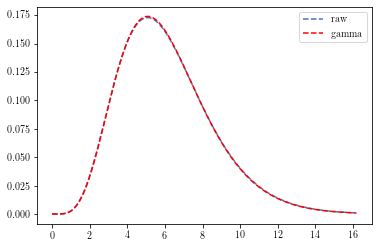

comp 0.1194470306433254
[5.08538173]


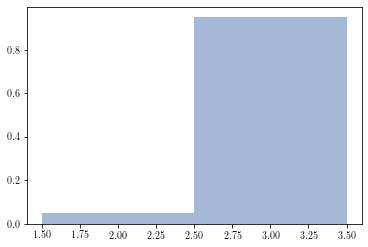

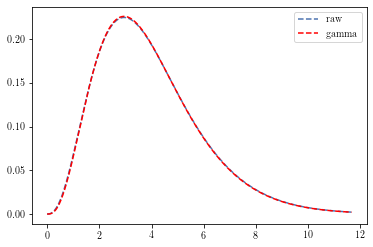

comp 0.1222363953067603
[2.94570363]


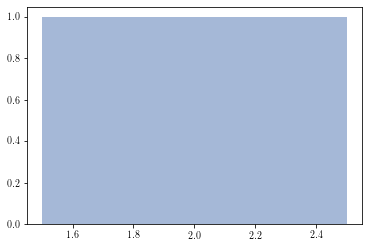

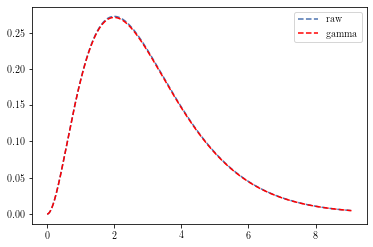

comp 0.12452726524834462
[1.9972249]


In [34]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

z_est = np.empty_like(znum, dtype=float)
z_comp = np.empty_like(znum, dtype=float)
for i in range(len(zmid)):
    # if i < 1:
    #     continue
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    plt.bar(ns, zweight, width=1, alpha=0.5)
    plt.show()
    m = 5
    comp = compz(zmid[i])
    lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
    plt.plot(lambdas, pn, label='raw', ls="--")
    plt.plot(lambdas, p_approx(lambdas, *popt_g), label='gamma', ls="--", c='r')
    # plt.plot(lambdas_0, poisson.pmf(znum[i], lambdas_0), 'C1')
    plt.legend()
    plt.show()
    print("comp", comp)
    print(popt_g)
    z_est[i] = popt_g[0]
    z_comp[i] = comp
    # break

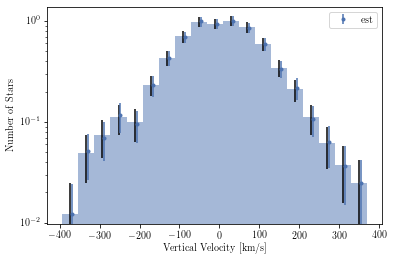

In [35]:
dz = np.min(np.diff(zedge))
plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.legend()
plt.yscale('log')
plt.show()

In [36]:
df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
df

#,mid,num,com
0,-367.9473684210526,0.9921838539437119,0.12523020097986848
1,-327.8421052631579,4.187091254793596,0.12308779409679398
2,-287.7368421052631,5.692832313001293,0.1204845942121026
3,-247.6315789473684,9.415047298431876,0.11729605681852504
4,-207.52631578947367,7.755431054869698,0.11335780593781229
...,...,...,...
14,193.5263157894737,17.736219095522276,0.11177408526450368
15,233.63157894736844,8.734390697626882,0.11601498808875071
16,273.73684210526324,5.0853817298062385,0.1194470306433254
17,313.842105263158,2.945703630281249,0.1222363953067603


In [37]:
name = spec_files[index].split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
name

'z_(-0.00)_(0.14).hdf5'

In [38]:
join(eff_dir, name)

'/home2/s20321005/Thesis-Project/Data/Effective-Volume/metal/z_(-0.00)_(0.14).hdf5'

# all of them

In [39]:
spec_files

['/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(-0.00)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.14)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Cluster/metal/gaia_(0.33)_(0.37).hdf5']

generating


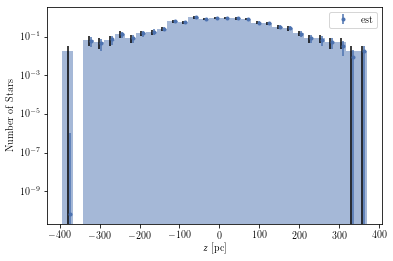

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 generating


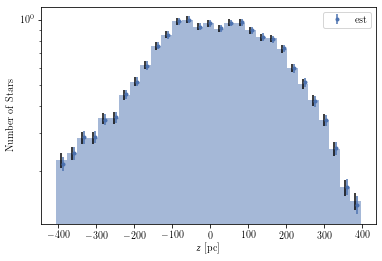

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 generating


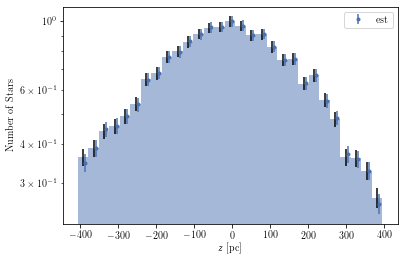

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

#,mid,num,com
0,-386.2068965517241,236.74975416089606,0.1958799912769698
1,-358.62068965517244,263.76675355951403,0.20412565471383595
2,-331.0344827586207,303.4125749486243,0.21280944675199587
3,-303.44827586206895,311.511417207793,0.22184776728786054
4,-275.86206896551727,334.59792069943865,0.23111454830233064
...,...,...,...
24,275.8620689655172,330.8692043724168,0.23111454830233066
25,303.4482758620689,251.63457348199296,0.22184776728786057
26,331.03448275862064,243.07511848659578,0.2128094467519959
27,358.6206896551724,222.13581827841702,0.20412565471383595


In [40]:
from scipy.interpolate import interp1d
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for index, file in enumerate(spec_files):
    gaia = vaex.open(file)
    gaia = gaia[['parallax', 'e_parallax', 'GLAT']]
    gaia = gaia.dropna()
    p = gaia['parallax'].to_numpy()/1000
    p_err = gaia['e_parallax'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    n = 50_000
    z_arr = vertical.generate_z(p, p_err, b, n=n)
    z = df_comp['z'].to_numpy()
    frac = df_comp[str(index)].to_numpy()
    compz = interp1d(z, frac, fill_value='interpolate', bounds_error=False)
    zb = np.max(z)
    zmax = np.max(z_arr)
    zmin = np.min(z_arr)
    zl = np.floor(np.maximum(zmin, -zb))
    zu = np.ceil(np.minimum(zmax, zb))
    zedge = np.linspace(zl, zu, 30)

    gaia = vaex.open(spec_files[index])
    zs = gaia['z'].to_numpy()
    znum, _ = np.histogram(zs, bins=zedge)
    zmid = (zedge[1:] + zedge[:-1])/2
    comp = compz(zmid)
    mask = (comp > 0)*(znum > 0)
    znum = znum[mask]
    zmid = zmid[mask]
    M = z_arr.shape[0]
    znum_est = np.empty((M, len(znum)), dtype=int)
    print("generating")
    for i in range(M):
        z_realization = z_arr[i]
        znum_est_i = np.histogram(z_realization, bins=zedge)[0]
        znum_est[i] = znum_est_i[mask]
    z_est = np.empty_like(znum, dtype=float)
    z_comp = np.empty_like(znum, dtype=float)
    for i in range(len(zmid)):
        nz_min = np.floor(znum_est[:, i].min())
        nz_max = np.ceil(znum_est[:, i].max())
        bins = np.arange(nz_min-1/2, nz_max+1/2)
        zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = zweight > 0
        zweight = zweight[mask]
        ns = ns[mask]
        m = 5
        comp = compz(zmid[i])
        lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
        pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        area = np.trapz(pn, lambdas)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
        z_est[i] = popt_g[0]
        z_comp[i] = comp
    dz = np.min(np.diff(zedge))
    plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
    plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
    plt.xlabel(r"$z$ [pc]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.yscale('log')
    plt.show()
    df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
    name = file.split("/")[-1].replace("gaia", "z")
    df.export(join(eff_dir, name), progress=True)
    # break
df